# Data Visualization using Python

### Installation of Pygal 

1. Start Command Prompt
2. type *python --version*
3. type *conda env list*
4. start root enviroment with *activate root*
5. type *pip install pygal*
6. Deactivate pygal

In [1]:
# Pygal return SVG images we need to import SVG to display them
from IPython.display import SVG

### Challenge 1

1. Import Pandas
2. Import Pygal
3. Read Dem_Health_Full.txt

In [2]:
# importing pandas
import pandas as pd

In [3]:
# importing pygal
import pygal

In [4]:
# reading data
health_data = pd.read_csv('Dem_Health_Full.txt', sep='\t')

In [5]:
# check the data has been read properly
health_data.head()
# health_data.head(2)
# health_data.tail()

,County,State,Population_Density,Poverty,Infant_Mortality,Suicide,Total_Births,Total_Deaths
0,Autauga,AL,82,10.4,5.9,16.6,3048.0,1867.0
1,Baldwin,AL,102,10.2,7.1,14.3,5471.0,4388.0
2,Barbour,AL,32,22.1,7.1,10.3,1835.0,1538.0
3,Bibb,AL,35,16.8,9.8,14.8,2801.0,2012.0
4,Blount,AL,86,11.9,9.0,14.4,3318.0,2453.0


In [6]:
data_for_al = health_data.loc[health_data['State'] == 'AL', ['Population_Density','Poverty']]
data_for_al.head()

,Population_Density,Poverty
0,82,10.4
1,102,10.2
2,32,22.1
3,35,16.8
4,86,11.9


In [7]:
lst = [tuple(x) for x in data_for_al.values]

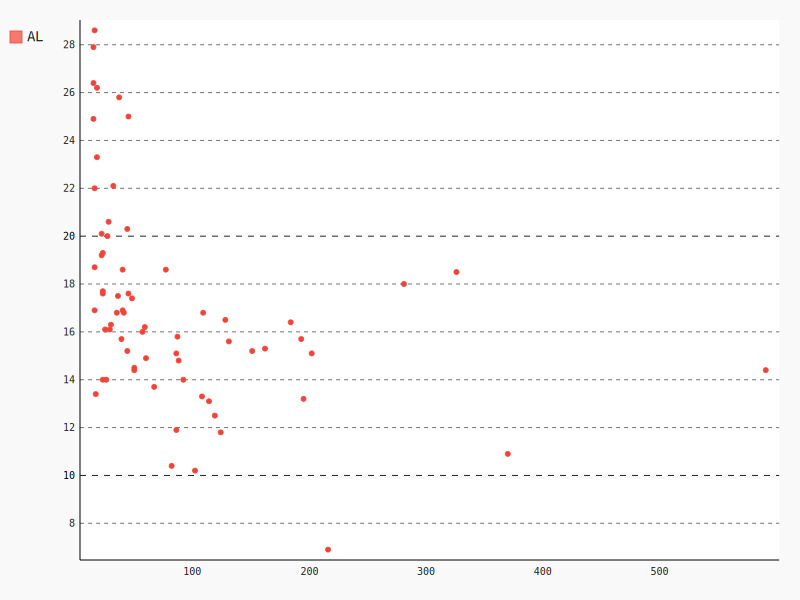

In [8]:
# lets create a scatter plot
scatter_plot = pygal.XY(stroke=False)
scatter_plot.add('AL', lst)
SVG(scatter_plot.render())

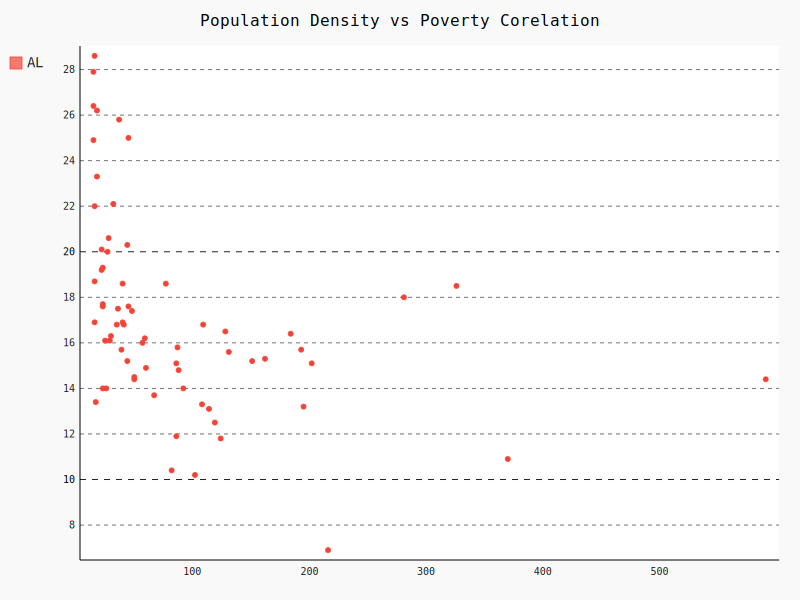

In [9]:
# lets us add a title
scatter_plot = pygal.XY(stroke=False)
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
SVG(scatter_plot.render())

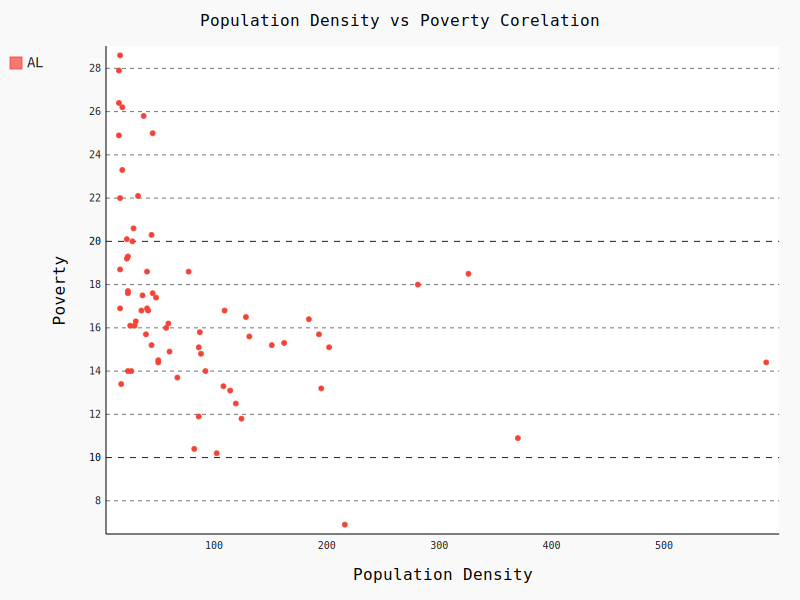

In [10]:
# we dont have labels for the X-axis and the Y-axis lets add that
scatter_plot = pygal.XY(stroke=False, x_title='Population Density', y_title='Poverty')
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
SVG(scatter_plot.render())

### Challenge 2

1. Get Population and Poverty data for Texas put it in a list

In [11]:
# Lets get data for Texas
data_for_tx = health_data.loc[health_data['State'] == 'TX', ['Population_Density','Poverty']]
data_for_tx.head()

,Population_Density,Poverty
2521,53,20.1
2522,8,15.0
2523,102,17.3
2524,98,18.5
2525,10,9.1


In [12]:
lst2 = [tuple(x) for x in data_for_al.values]

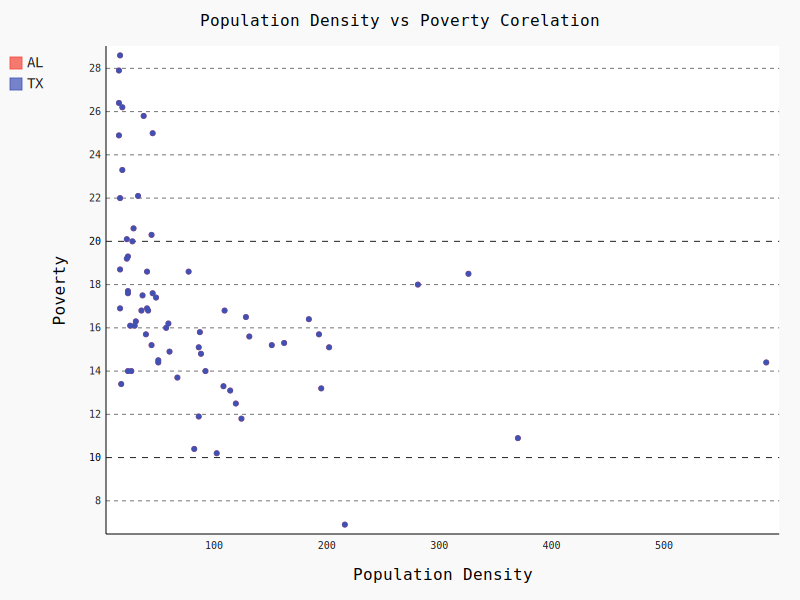

In [13]:
# Let us add TX data to the chart
scatter_plot = pygal.XY(stroke=False, x_title='Population Density', y_title='Poverty')
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
scatter_plot.add('TX', lst2)
SVG(scatter_plot.render())

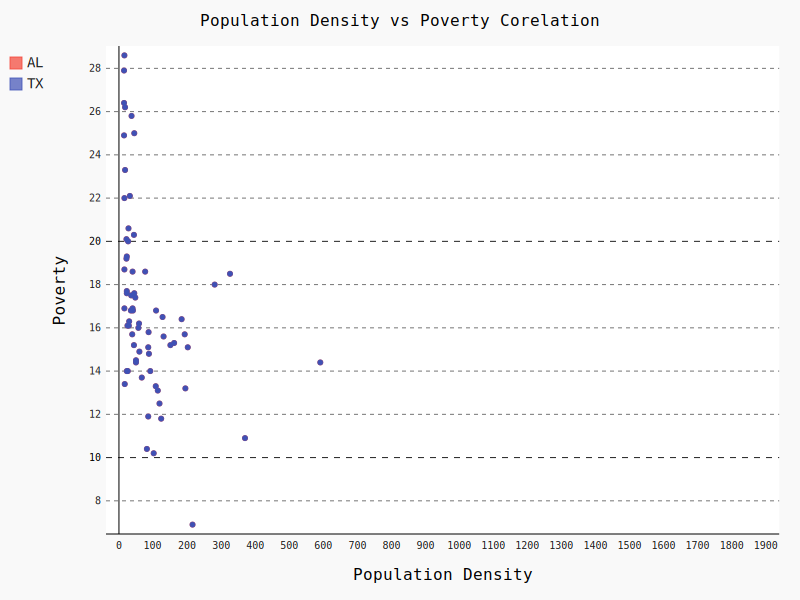

In [14]:
# adjusting x-label
scatter_plot = pygal.XY(stroke=False, x_title='Population Density', y_title='Poverty', min_scale=10)
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.x_labels = (i for i in range (0, 2000, 100))
scatter_plot.add('AL', lst)
scatter_plot.add('TX', lst2)
SVG(scatter_plot.render())

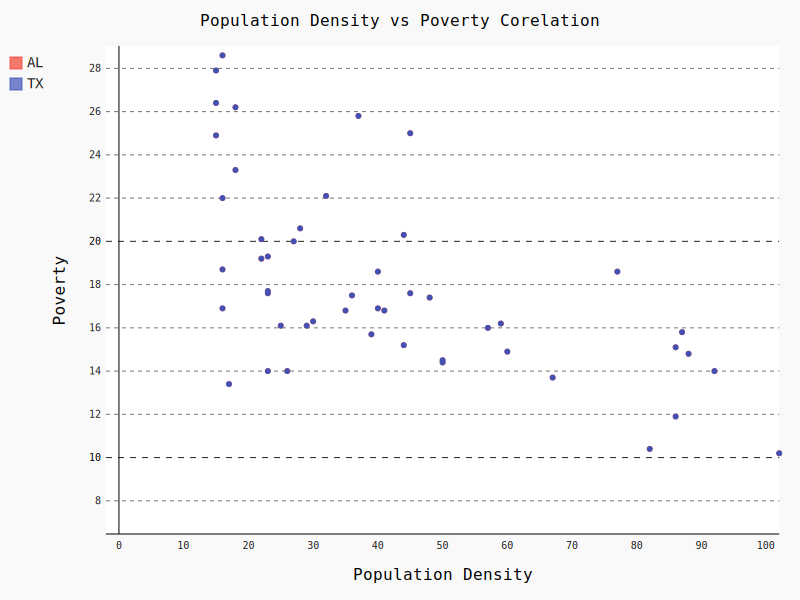

In [15]:
# adjust x axis range
scatter_plot = pygal.XY(stroke=False, x_title='Population Density', y_title='Poverty', xrange=(0,100))
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
scatter_plot.add('TX', lst2)
SVG(scatter_plot.render())

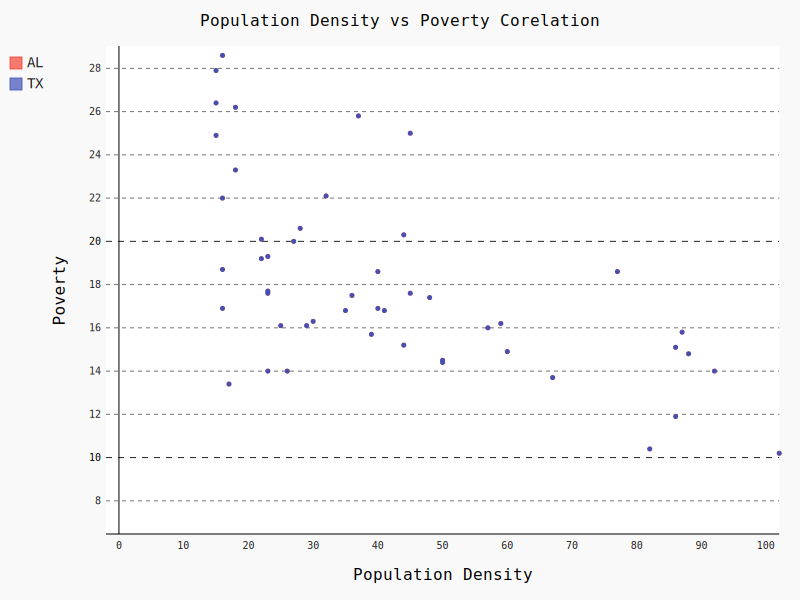

In [16]:
# adjust dot size
scatter_plot = pygal.XY(stroke=False, x_title='Population Density', y_title='Poverty', xrange=(0,100), dots_size=2)
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
scatter_plot.add('TX', lst2)
SVG(scatter_plot.render())

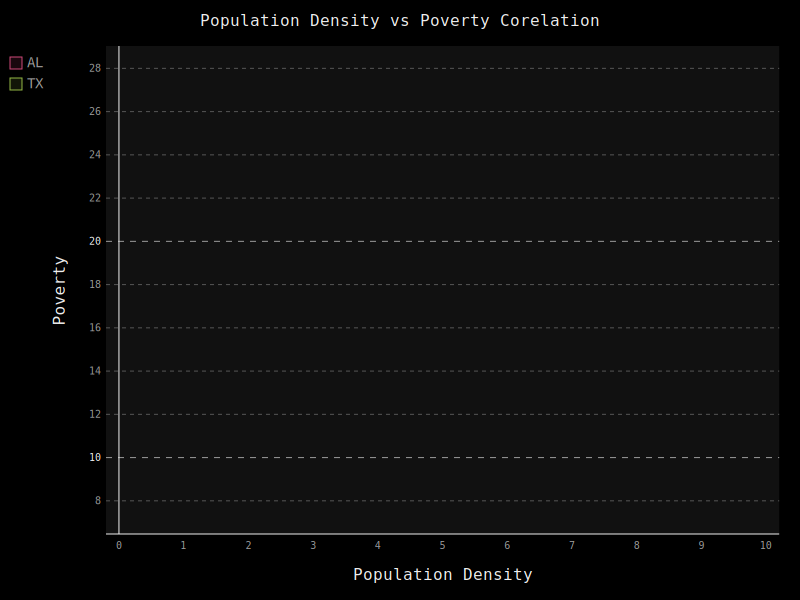

In [17]:
# one last cool stuff
from pygal.style import NeonStyle
scatter_plot = pygal.XY(stroke=True, x_title='Population Density', y_title='Poverty', xrange=(0,10), dots_size=2, style=NeonStyle, fill=True)
scatter_plot.title = 'Population Density vs Poverty Corelation'
scatter_plot.add('AL', lst)
scatter_plot.add('TX', lst2)
SVG(scatter_plot.render())


In [18]:

al = health_data.loc[health_data['State'] == 'AL',['Poverty']]
sucide_mean_al = al['Poverty'].mean()
sucide_mean_al

17.085074626865676

In [19]:
def mean_of_column(state_name, column_name):
    state_df = health_data.loc[health_data['State'] == state_name,[column_name]]
    return state_df[column_name].mean()
# mean_of_column('TX', 'Poverty')

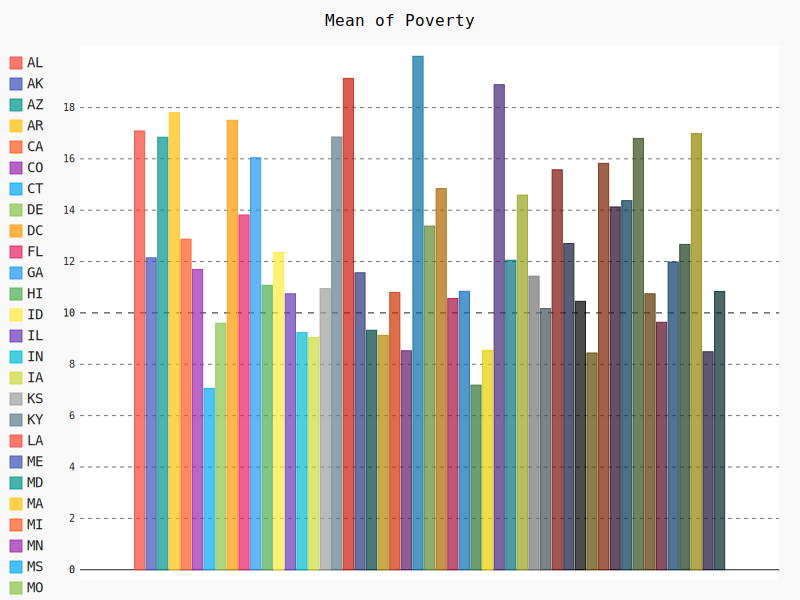

In [20]:
# Vertical Bars
line_chart = pygal.Bar()
line_chart.title = 'Mean of Poverty'
for state in list(health_data['State'].unique()):
    line_chart.add(state,mean_of_column(state,'Poverty'))
SVG(line_chart.render())

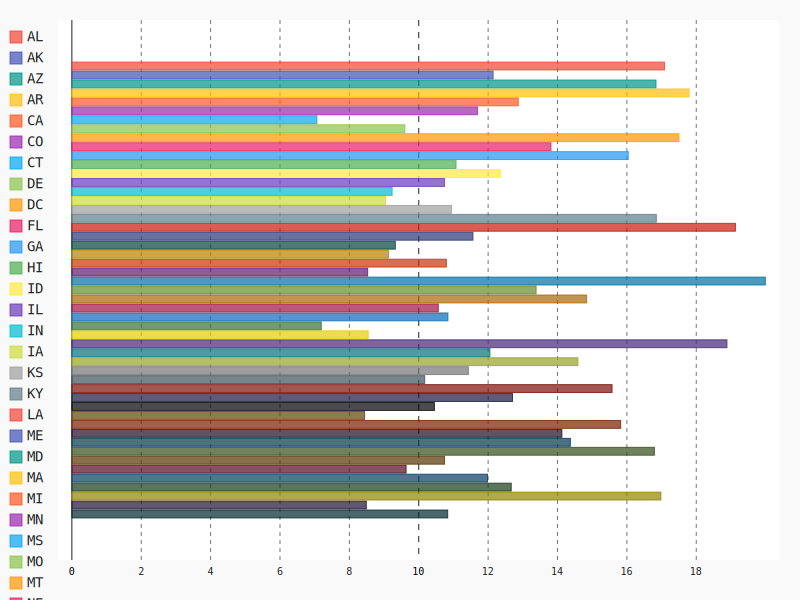

In [21]:
# Horizontal Bars
line_chart = pygal.HorizontalBar()
for state in list(health_data['State'].unique()):
    line_chart.add(state,mean_of_column(state,'Poverty'))
SVG(line_chart.render())

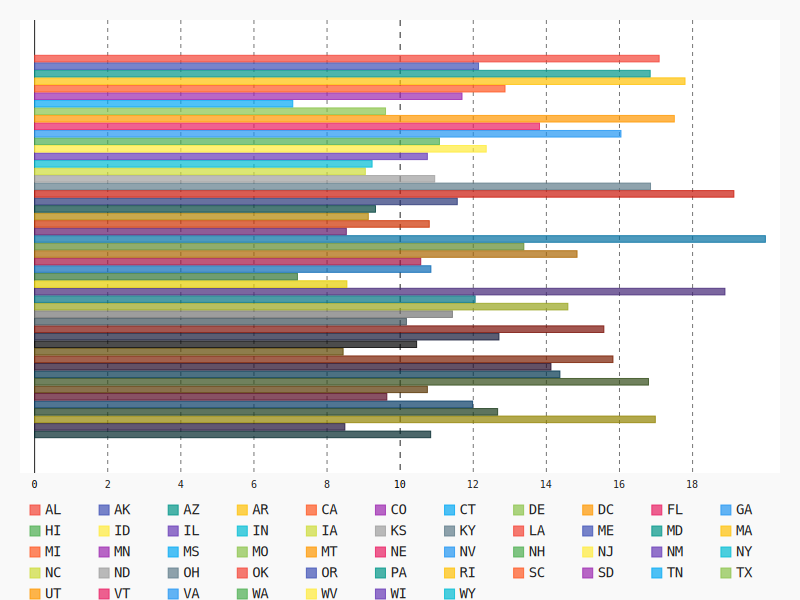

In [23]:
# Legends dont look proper
line_chart = pygal.HorizontalBar(legend_box_size=10, legend_at_bottom=True, legend_at_bottom_columns=11)
for state in list(health_data['State'].unique()):
    line_chart.add(state,mean_of_column(state,'Poverty'))
SVG(line_chart.render())